In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('dataverse_game_dataset.csv')

In [3]:
df.shape

(320, 8)

In [4]:
df.head()

,Player ID,Sessions Played,Game Mode,Session Duration (mins),Spending (USD),Engagement Score,Date Played,Device Used
0,Player1569,48,Battle Royale,31.227680,43.590453,8.338405,NaN,NaN
1,Player5419,2,Survival,38.833092,31.987079,NaN,1/2/2024,PC
2,Player9156,45,Team Deathmatch,NaN,9.771423,9.060463,1/3/2024,NaN
3,Player7715,23,Battle Royale,NaN,16.330170,3.567501,1/4/2024,MOBILE
4,Player4382,12,Battle-Royale,39.029835,4.490488,3.804702,1/5/2024,Console


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Player ID                320 non-null    object 
 1   Sessions Played          320 non-null    int64  
 2   Game Mode                320 non-null    object 
 3   Session Duration (mins)  304 non-null    float64
 4   Spending (USD)           304 non-null    float64
 5   Engagement Score         304 non-null    float64
 6   Date Played              216 non-null    object 
 7   Device Used              189 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 20.1+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Player ID                    0
Sessions Played              0
Game Mode                    0
Session Duration (mins)     16
Spending (USD)              16
Engagement Score            16
Date Played                104
Device Used                131
dtype: int64

In [8]:


numeric_columns = ['Session Duration (mins)', 'Spending (USD)', 'Engagement Score']

for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())


In [9]:
df.isna().sum()

Player ID                    0
Sessions Played              0
Game Mode                    0
Session Duration (mins)      0
Spending (USD)               0
Engagement Score             0
Date Played                104
Device Used                131
dtype: int64

In [10]:
df['Device Used'].unique()


array([nan, 'PC', 'MOBILE', 'Console', 'Tablet', 'pc', 'Mobile'],
      dtype=object)

In [11]:
df['Device Used'] = df['Device Used'].str.lower().str.strip() 

In [12]:
df['Device Used'].value_counts()

Device Used
mobile     67
pc         66
console    30
tablet     26
Name: count, dtype: int64

In [13]:
mode_value = df['Device Used'].mode()[0]  # mode() returns a Series, take the first mode

# Fill NaN with the mode value
df['Device Used'].fillna(mode_value,inplace= True)

/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_87850/936198210.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Device Used'].fillna(mode_value,inplace= True)


In [14]:
df.isna().sum()

Player ID                    0
Sessions Played              0
Game Mode                    0
Session Duration (mins)      0
Spending (USD)               0
Engagement Score             0
Date Played                104
Device Used                  0
dtype: int64

In [15]:
df['Date Played'].unique()

array([nan, '1/2/2024', '1/3/2024', '1/4/2024', '1/5/2024', '1/6/2024',
       '1/8/2024', '1/9/2024', '1/10/2024', '1/11/2024', '1/12/2024',
       '1/14/2024', '1/16/2024', '1/17/2024', '1/20/2024', '1/21/2024',
       '1/22/2024', '1/24/2024', '1/26/2024', '1/28/2024', '1/29/2024',
       '1/30/2024', '1/31/2024', '2/1/2024', '2/4/2024', '2/5/2024',
       '2/6/2024', '2/7/2024', '2/8/2024', '2/10/2024', '2/12/2024',
       '2/14/2024', '2/15/2024', '2/18/2024', '2/19/2024', '2/21/2024',
       '2/23/2024', '2/26/2024', '2/27/2024', '2/28/2024', '2/29/2024',
       '3/1/2024', '3/2/2024', '3/3/2024', '3/4/2024', '3/5/2024',
       '3/6/2024', '3/7/2024', '3/8/2024', '3/9/2024', '3/11/2024',
       '3/12/2024', '3/13/2024', '3/15/2024', '3/16/2024', '3/17/2024',
       '3/20/2024', '3/22/2024', '3/24/2024', '3/26/2024', '3/27/2024',
       '3/28/2024', '3/29/2024', '3/30/2024', '4/1/2024', '4/2/2024',
       '4/5/2024', '4/8/2024', '4/9/2024', '4/11/2024', '4/14/2024',
       '4/15/2

In [16]:
import numpy as np
# Given array
dates = np.array([np.nan, '1/2/2024', '1/3/2024', '1/4/2024', '1/5/2024', '1/6/2024',
       '1/8/2024', '1/9/2024', '1/10/2024', '1/11/2024', '1/12/2024',
       '1/14/2024', '1/16/2024', '1/17/2024', '1/20/2024', '1/21/2024',
       '1/22/2024', '1/24/2024', '1/26/2024', '1/28/2024', '1/29/2024',
       '1/30/2024', '1/31/2024', '2/1/2024', '2/4/2024', '2/5/2024',
       '2/6/2024', '2/7/2024', '2/8/2024', '2/10/2024', '2/12/2024',
       '2/14/2024', '2/15/2024', '2/18/2024', '2/19/2024', '2/21/2024',
       '2/23/2024', '2/26/2024', '2/27/2024', '2/28/2024', '2/29/2024',
       '3/1/2024', '3/2/2024', '3/3/2024', '3/4/2024', '3/5/2024',
       '3/6/2024', '3/7/2024', '3/8/2024', '3/9/2024', '3/11/2024',
       '3/12/2024', '3/13/2024', '3/15/2024', '3/16/2024', '3/17/2024',
       '3/20/2024', '3/22/2024', '3/24/2024', '3/26/2024', '3/27/2024',
       '3/28/2024', '3/29/2024', '3/30/2024', '4/1/2024', '4/2/2024',
       '4/5/2024', '4/8/2024', '4/9/2024', '4/11/2024', '4/14/2024',
       '4/15/2024', '4/16/2024', '4/17/2024', '4/18/2024', '4/19/2024',
       '4/21/2024', '4/22/2024', '4/24/2024', '4/25/2024', '4/27/2024',
       '4/28/2024', '4/29/2024', '5/1/2024', '5/4/2024', '5/6/2024',
       '5/7/2024', '5/9/2024', '5/11/2024', '5/13/2024', '5/16/2024',
       '5/18/2024', '5/19/2024', '5/23/2024', '5/24/2024', '5/26/2024',
       '5/27/2024', '5/28/2024', '5/29/2024', '5/30/2024', '6/3/2024',
       '6/4/2024', '6/6/2024', '6/7/2024', '6/8/2024', '6/11/2024',
       '6/13/2024', '6/14/2024', '6/16/2024', '6/18/2024', '6/19/2024',
       '6/20/2024', '6/21/2024', '6/22/2024', '6/23/2024', '6/26/2024',
       '6/28/2024', '7/1/2024', '7/2/2024', '7/3/2024', '7/4/2024',
       '7/5/2024', '7/6/2024', '7/7/2024', '7/8/2024', '7/9/2024',
       '7/10/2024', '7/13/2024', '7/14/2024', '7/15/2024', '7/16/2024',
       '7/22/2024', '7/23/2024', '7/24/2024', '7/25/2024', '7/27/2024',
       '7/30/2024', '8/1/2024', '8/2/2024', '8/3/2024', '8/4/2024',
       '8/6/2024', '8/7/2024', '8/8/2024', '8/9/2024', '8/10/2024',
       '8/11/2024', '8/14/2024', '8/15/2024', '8/16/2024', '8/17/2024',
       '8/18/2024', '8/19/2024', '8/20/2024', '8/21/2024', '8/22/2024',
       '8/23/2024', '8/24/2024', '8/25/2024', '8/26/2024', '8/27/2024',
       '8/28/2024', '8/29/2024', '8/30/2024', '8/31/2024', '9/1/2024',
       '9/2/2024', '9/3/2024', '9/6/2024', '9/8/2024', '9/9/2024',
       '9/10/2024', '9/12/2024', '9/13/2024', '9/15/2024', '9/16/2024',
       '9/21/2024', '9/24/2024', '9/25/2024', '9/26/2024', '9/27/2024',
       '9/29/2024', '9/30/2024', '10/2/2024', '10/4/2024', '10/6/2024',
       '10/9/2024', '10/10/2024', '10/12/2024', '10/14/2024',
       '10/15/2024', '10/16/2024', '10/17/2024', '10/19/2024',
       '10/20/2024', '10/22/2024', '10/23/2024', '10/24/2024',
       '10/25/2024', '10/26/2024', '10/28/2024', '10/29/2024',
       '10/30/2024', '10/31/2024', '11/1/2024', '11/2/2024', '11/3/2024',
       '11/4/2024', '11/7/2024', '11/8/2024', '11/9/2024', '11/10/2024',
       '11/11/2024', '11/12/2024', '11/13/2024', '11/14/2024',
       '11/15/2024'], dtype=object)

# Convert to DataFrame
date = pd.DataFrame({'Date Played': dates})

# Convert column to datetime format
df['Date Played'] = pd.to_datetime(df['Date Played'], errors='coerce')

# Fill NaN with the most frequent date (mode)
mode_date = df['Date Played'].mode()[0]
df['Date Played'].fillna(mode_date, inplace=True)

# Convert to standard string format
df['Date Played'] = df['Date Played'].dt.strftime('%Y-%m-%d')

print(date)


    Date Played
0           NaN
1      1/2/2024
2      1/3/2024
3      1/4/2024
4      1/5/2024
..          ...
212  11/11/2024
213  11/12/2024
214  11/13/2024
215  11/14/2024
216  11/15/2024

[217 rows x 1 columns]


/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_87850/1264061029.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date Played'].fillna(mode_date, inplace=True)


In [17]:
df.isna().sum()

Player ID                  0
Sessions Played            0
Game Mode                  0
Session Duration (mins)    0
Spending (USD)             0
Engagement Score           0
Date Played                0
Device Used                0
dtype: int64

In [18]:
df.to_csv("cleaned_dataset.csv", index=False)

In [19]:
df['Player ID'].unique()

array(['Player1569', 'Player5419', 'Player9156', 'Player7715',
       'Player4382', 'Player3188', 'Player3483', 'Player2256',
       'Player9170', 'Player2126', 'Player2578', 'Player3294',
       'Player6820', 'Player3523', 'Player5147', 'Player1159',
       'Player5949', 'Player2205', 'Player2151', 'Player1523',
       'Player6670', 'Player9445', 'Player1568', 'Player4395',
       'Player9290', 'Player7303', 'Player3838', 'Player8461',
       'Player5778', 'Player8248', 'Player3739', 'Player1325',
       'Player4757', 'Player1320', 'Player3599', 'Player2469',
       'Player8367', 'Player4842', 'Player2747', 'Player6239',
       'Player2470', 'Player6745', 'Player2474', 'Player2033',
       'Player8796', 'Player4638', 'Player4009', 'Player2908',
       'Player5903', 'Player6943', 'Player4710', 'Player8714',
       'Player8956', 'Player7722', 'Player6252', 'Player2365',
       'Player2888', 'Player9498', 'Player9861', 'Player7606',
       'Player6477', 'Player9154', 'Player6289', 'Playe

In [20]:
# Average session duration per player
avg_session_duration = df.groupby("Player ID")["Session Duration (mins)"].mean()

# Retention rate: Percentage of players who played more than once
retention_rate = (df["Player ID"].value_counts() > 1).mean()


In [21]:
# Revenue per user
df["Revenue per User"] = df["Spending (USD)"] / df["Sessions Played"]

# Churn Probability
df["Churn Probability"] = (df["Session Duration (mins)"] <= 15).astype(int)


In [22]:
df["Date Played"] = pd.to_datetime(df["Date Played"], errors="coerce")


In [23]:
df["Cohort"] = (df["Date Played"].dt.month - 1) // 3 + 1  # Q1, Q2, Q3, Q4
df["Cohort"] = "Q" + df["Cohort"].astype(str) + " " + df["Date Played"].dt.year.astype(str)


In [24]:
# Average session duration per cohort
cohort_session_duration = df.pivot_table(values="Session Duration (mins)", index="Cohort", aggfunc="mean")

# Total spending per cohort
cohort_spending = df.pivot_table(values="Spending (USD)", index="Cohort", aggfunc="sum")

# Retention per cohort
cohort_retention = df.pivot_table(values="Player ID", index="Cohort", aggfunc=pd.Series.nunique)


In [25]:
device_engagement = df.groupby("Device Used")["Engagement Score"].mean()


In [26]:
df.tail()

,Player ID,Sessions Played,Game Mode,Session Duration (mins),Spending (USD),Engagement Score,Date Played,Device Used,Revenue per User,Churn Probability,Cohort
315,Player9441,10,Capture the Flag,29.617351,9.255045,6.630315,2024-11-11,mobile,0.925504,0,Q4 2024
316,Player2752,24,Survival,33.125811,13.065685,9.438799,2024-11-12,mobile,0.544404,0,Q4 2024
317,Player9500,42,Battle-Royale,36.122160,15.012949,1.416577,2024-11-13,mobile,0.357451,0,Q4 2024
318,Player2330,36,team deathmatch,24.798664,35.573759,2.390611,2024-11-14,mobile,0.988160,0,Q4 2024
319,Player9957,45,Capture the Flag,29.806071,2.998600,1.720393,2024-11-15,pc,0.066636,0,Q4 2024


In [27]:
df.to_csv("Transformed_dataset.csv", index=False)


/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_87850/1315876123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_activity.index, y=daily_activity.values, palette="rocket")


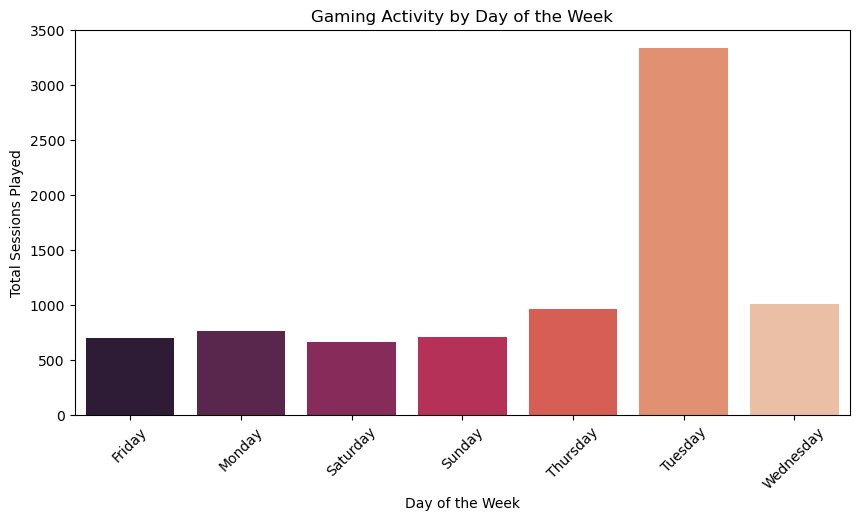

In [28]:
df["Day of Week"] = pd.to_datetime(df["Date Played"]).dt.day_name()
daily_activity = df.groupby("Day of Week")["Sessions Played"].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_activity.index, y=daily_activity.values, palette="rocket")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sessions Played")
plt.title("Gaming Activity by Day of the Week")
plt.xticks(rotation=45)
plt.show()


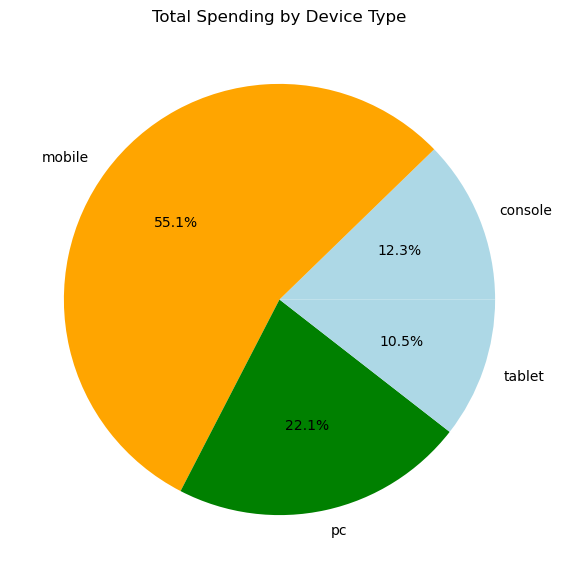

In [29]:
device_spending = df.groupby("Device Used")["Spending (USD)"].sum()

plt.figure(figsize=(7, 7))
plt.pie(device_spending, labels=device_spending.index, autopct="%1.1f%%", colors=["lightblue", "orange", "green"])
plt.title("Total Spending by Device Type")
plt.show()


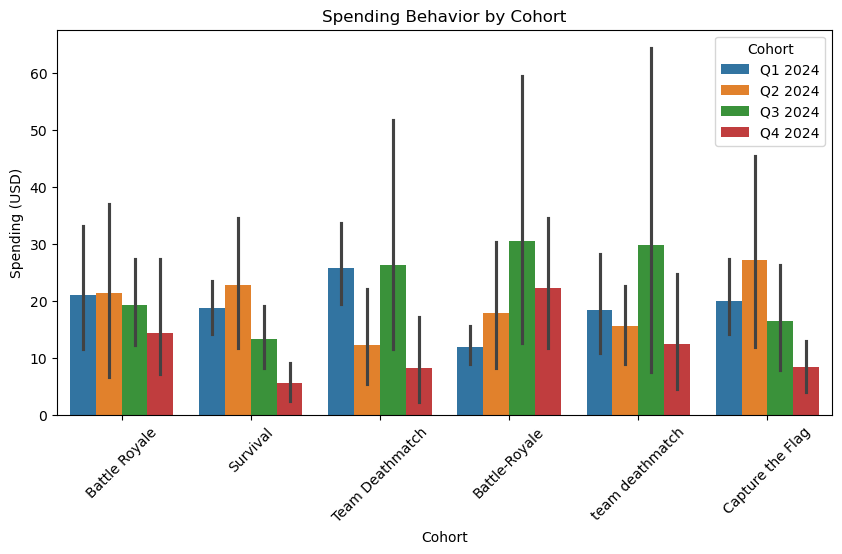

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Game Mode',hue="Cohort", y="Spending (USD)", data=df)
plt.xlabel("Cohort")
plt.ylabel("Spending (USD)")
plt.title("Spending Behavior by Cohort")
plt.xticks(rotation=45)
plt.show()


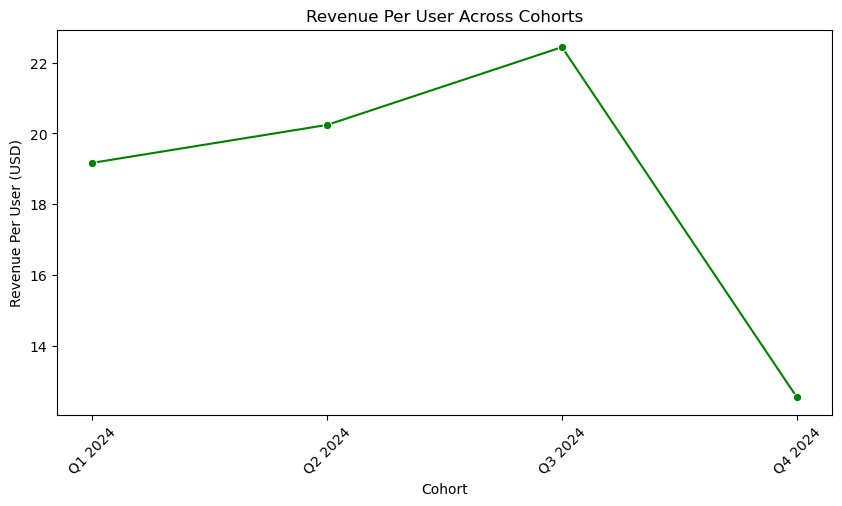

In [31]:
rpu = df.groupby("Cohort")["Spending (USD)"].sum() / df.groupby("Cohort")["Player ID"].nunique()

plt.figure(figsize=(10, 5))
sns.lineplot(x=rpu.index, y=rpu.values, marker="o", color="green")
plt.xlabel("Cohort")
plt.ylabel("Revenue Per User (USD)")
plt.title("Revenue Per User Across Cohorts")
plt.xticks(rotation=45)
plt.show()


/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_87850/3508918894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="magma")


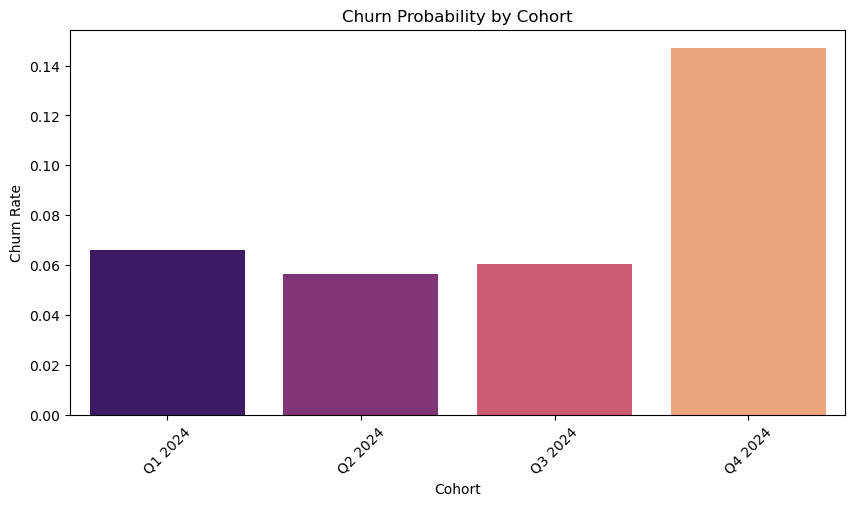

In [32]:
df["Churn Probability"] = (df["Session Duration (mins)"] <= 15).astype(int)
churn_rate = df.groupby("Cohort")["Churn Probability"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="magma")
plt.xlabel("Cohort")
plt.ylabel("Churn Rate")
plt.title("Churn Probability by Cohort")
plt.xticks(rotation=45)
plt.show()


/var/folders/zz/mtjch0cs3f5fyjxlm9h1bbd00000gn/T/ipykernel_87850/2957652474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_players.index, y=active_players.values, palette="viridis")


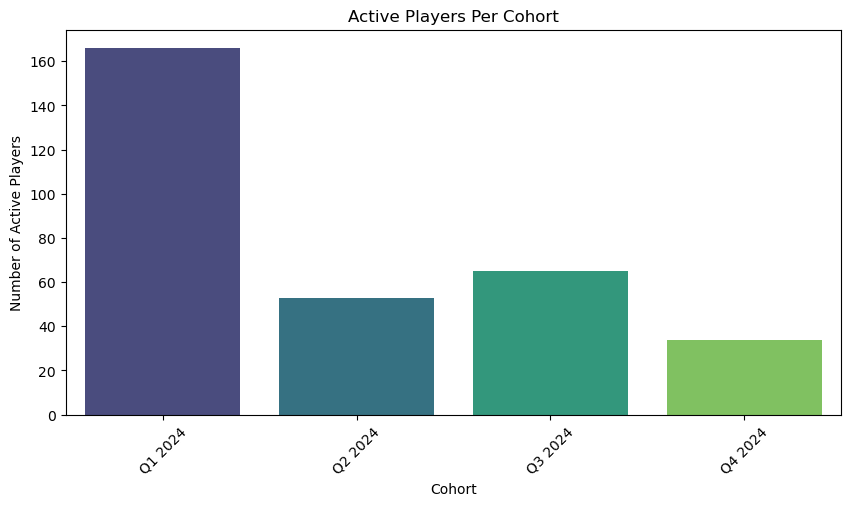

In [33]:

active_players = df.groupby("Cohort")["Player ID"].nunique()

plt.figure(figsize=(10, 5))
sns.barplot(x=active_players.index, y=active_players.values, palette="viridis")
plt.xlabel("Cohort")
plt.ylabel("Number of Active Players")
plt.title("Active Players Per Cohort")
plt.xticks(rotation=45)
plt.show()


In [36]:
df.var(numeric_only=True)

Sessions Played            208.218956
Session Duration (mins)     99.356551
Spending (USD)             496.468715
Engagement Score             6.707553
Revenue per User            23.417647
Churn Probability            0.066918
dtype: float64